#  **Exploring Explainable AI Techniques in Airline Passenger Satisfaction Dataset**

![Explainable Artificial Intelligence](../docs/images/Explainable_Artificial_Intelligence.png)

---

## **Introduction**

In recent years, machine learning models have demonstrated remarkable performance in various domains, such as healthcare, finance, and customer satisfaction. However, the increasing complexity of these models, often termed "black-box" models, has introduced significant challenges in understanding and interpreting their decisions. This has led to the emergence of **Explainable Artificial Intelligence (XAI)**, a field dedicated to developing techniques that make these models more transparent and interpretable without compromising their predictive power.

**The objective of this project is to explore, implement, and evaluate XAI techniques** in the context of a classification problem. By applying **pre-modelling**, **in-modelling**, and **post-modelling** XAI methods, the project aims to shed light on how well these approaches enhance interpretability while maintaining model performance. 

The dataset chosen for this project is the **Airline Passenger Satisfaction** Dataset, a publicly available tabular dataset that contains information about passengers’ satisfaction levels based on various factors such as flight distance, in-flight service quality, and seat comfort. This dataset is particularly suitable for the project as it involves a real-world classification task—predicting whether a passenger is satisfied or dissatisfied.

---

## **Pre-Requisites**

To run this notebook, make sure you have the following libraries installed:
```bash
pip install pandas
pip install numpy
pip install matplotlib
pip install seaborn
pip install scikit-learn
pip install shap
pip install lime
pip install dice-ml
```

- Note: `dice_ml` is not available for Python 3.12 yet. Please use Python 3.11 or lower versions.

---

## **1. Dataset Overview**

### Importing Libraries

In [60]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scikit-learn modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neighbors import KernelDensity
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_distances

# DiCE modules
import dice_ml
from dice_ml import Dice

# Lime modules
import lime
import lime.lime_tabular

# SHAP modules
import shap

# Jensen-Shannon Divergence modules
from scipy.spatial.distance import jensenshannon

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

### Loading the Dataset

In [61]:
df = pd.read_csv('../data/airline_passenger_satisfaction.csv')

pd.set_option('display.max_columns', None)
df.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  Check-in Service  Online Boarding  Gate Location  \
0                       3                 4                3              3   
1                       2                 3                5              2   
2                       4                 4                5              4   
3                       2                 3                4              2   
4                       3                 3                5              3   

   On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                 3             5                 2            5   
1                 5             4                 5            5   
2                 3             5                 3            5   
3                 5             5                 5            4   
4                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  
4                        3                 3                Satisfied

### Data Exploration

In [62]:
df.shape

(129880, 24)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [64]:
df.describe()

ID            Age  Flight Distance  Departure Delay  \
count  129880.000000  129880.000000    129880.000000    129880.000000   
mean    64940.500000      39.427957      1190.316392        14.713713   
std     37493.270818      15.119360       997.452477        38.071126   
min         1.000000       7.000000        31.000000         0.000000   
25%     32470.750000      27.000000       414.000000         0.000000   
50%     64940.500000      40.000000       844.000000         0.000000   
75%     97410.250000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129880.000000   
mean       15.091129                                3.057599   
std        38.465650                                1.526741   
min         0.000000                                0.000000   
25%         0.000000                                2.000000   
50%         0.000000                                3.000000   
75%        13.000000                                4.000000   
max      1584.000000                                5.000000   

       Ease of Online Booking  Check-in Service  Online Boarding  \
count           129880.000000     129880.000000    129880.000000   
mean                 2.756876          3.306267         3.252633   
std                  1.401740          1.266185         1.350719   
min                  0.000000          0.000000         0.000000   
25%                  2.000000          3.000000         2.000000   
50%                  3.000000          3.000000         3.000000   
75%                  4.000000          4.000000         4.000000   
max                  5.000000          5.000000         5.000000   

       Gate Location  On-board Service   Seat Comfort  Leg Room Service  \
count  129880.000000     129880.000000  129880.000000     129880.000000   
mean        2.976925          3.383023       3.441361          3.350878   
std         1.278520          1.287099       1.319289          1.316252   
min         0.000000          0.000000       0.000000          0.000000   
25%         2.000000          2.000000       2.000000          2.000000   
50%         3.000000          4.000000       4.000000          4.000000   
75%         4.000000          4.000000       5.000000          4.000000   
max         5.000000          5.000000       5.000000          5.000000   

         Cleanliness  Food and Drink  In-flight Service  \
count  129880.000000   129880.000000      129880.000000   
mean        3.286326        3.204774           3.642193   
std         1.313682        1.329933           1.176669   
min         0.000000        0.000000           0.000000   
25%         2.000000        2.000000           3.000000   
50%         3.000000        3.000000           4.000000   
75%         4.000000        4.000000           5.000000   
max         5.000000        5.000000           5.000000   

       In-flight Wifi Service  In-flight Entertainment  Baggage Handling  
count           129880.000000            129880.000000     129880.000000  
mean                 2.728696                 3.358077          3.632114  
std                  1.329340                 1.334049          1.180025  
min                  0.000000                 0.000000          1.000000  
25%                  2.000000                 2.000000          3.000000  
50%                  3.000000                 4.000000          4.000000  
75%                  4.000000                 4.000000          5.000000  
max                  5.000000                 5.000000          5.000000

In [65]:
# Check for missing values
print(df.isnull().sum())

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [66]:
# Check for duplicates
print(df.duplicated().sum())

0


In [67]:
# Check the unique values in the Satisfaction feature
print(df['Satisfaction'].unique())

['Neutral or Dissatisfied' 'Satisfied']


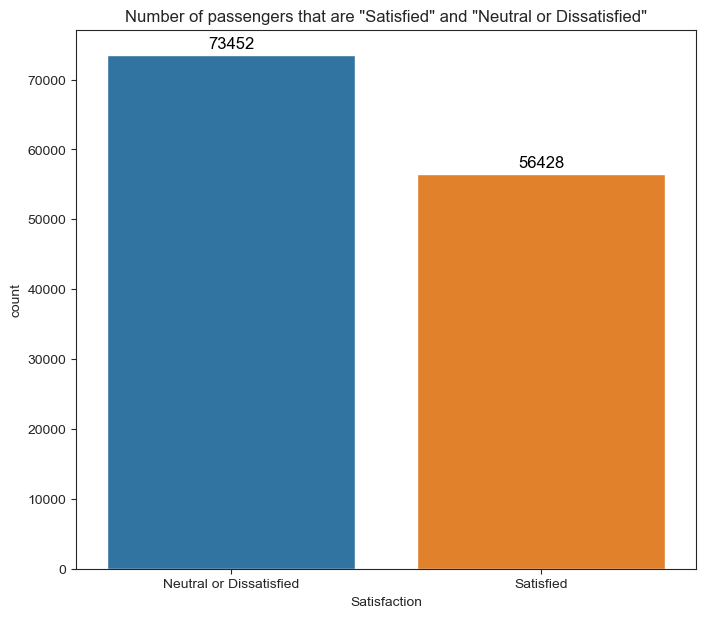

In [68]:
plt.figure(figsize=(8, 7))

# Plot the number of passengers that are "Satisfied" and "Neutral or Dissatisfied"
sns.countplot(x='Satisfaction', data=df)
plt.title('Number of passengers that are "Satisfied" and "Neutral or Dissatisfied"')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

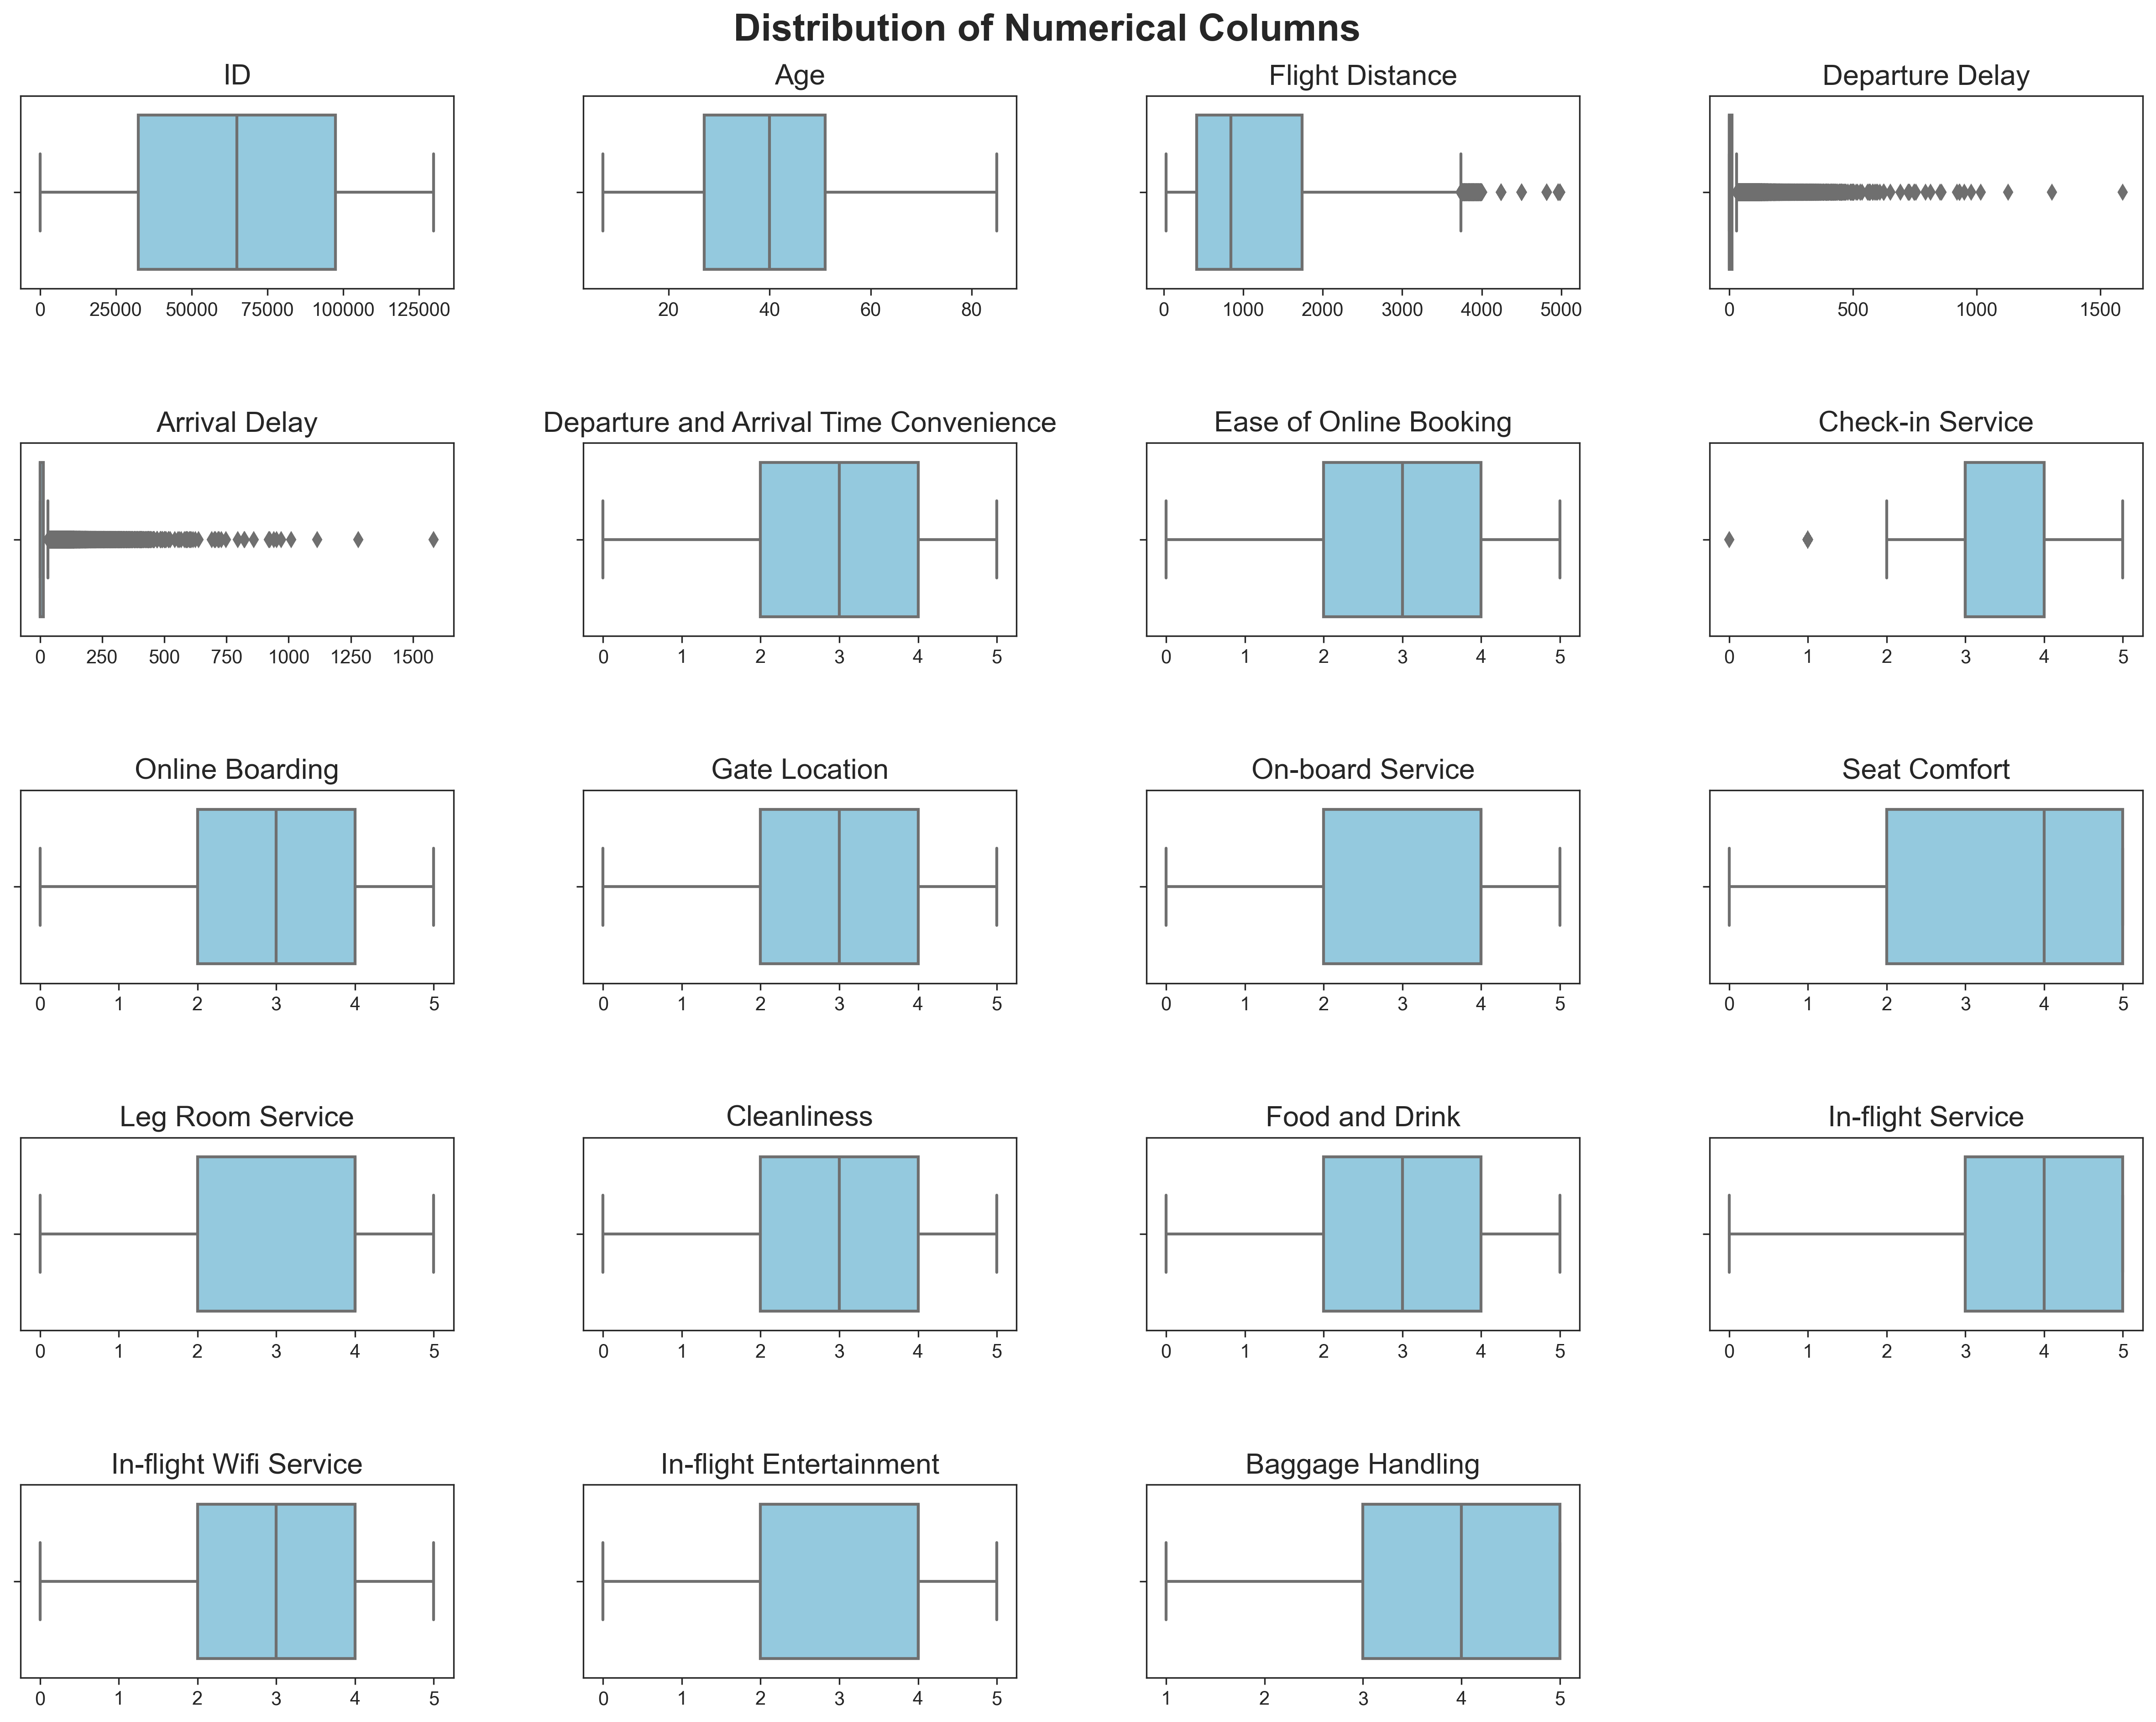

In [69]:
# Set the style
sns.set_style('ticks')

# Select numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(nrows=int(np.ceil(len(numerical_features) / 4)), ncols=4, figsize=(20, 15), dpi=300)
axes = axes.flatten()

# Plot box plots for each numerical feature
for i, column in enumerate(numerical_features):
    ax = axes[i]
    sns.boxplot(x=df[column], ax=ax, color='skyblue') 
    ax.set_title(column, size=15)
    ax.set_xlabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and add a main title
plt.subplots_adjust(hspace=0.8, wspace=0.3)
fig.suptitle("Distribution of Numerical Columns", size=20, fontweight='bold', y=0.92)
plt.show()

---

## **2. Data Preprocessing**

### Handling Missing Values

We detected 393 missing values in the `Arrival Delay` feature. A simple approach to handle these missing values is to replace them with the median value of the feature.

In [70]:
# Handling missing values in the Arrival Delay feature
df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)

print(df.isnull().sum())

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

### Feature Engineering

1. **Encode the Target Variable**

The goal of this project is to classify airline passenger satisfaction based on various features. The target variable, `Satisfaction`, contains two unique values:

- `Neutral or Dissatisfied`
- `Satisfied`

To simplify the classification task, we transform the target variable into a binary format:

- `Satisfied = 1`
- `Neutral or Dissatisfied = 0`

This transformation enables us to approach the problem as a binary classification task.

2. **Convert Categorical Variables to Numeric**

3. **Remove Unnecessary Features**

The `ID`feature does not provide any valuable information for the classification task. Therefore, we remove it from the dataset. 

In [71]:
# Create a copy of the original dataframe
df_encoded = df.copy()

# Value counts of the Satisfaction feature before transformation
print("Value counts of the Satisfaction feature before transformation: ")
print(df_encoded['Satisfaction'].value_counts())

# Convert the Satisfaction feature to binary: 'Satisfied' = 1, 'Neutral or Dissatisfied' = 0
df_encoded['Satisfaction'] = df_encoded['Satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)

# Value counts of the Satisfaction feature after transformation
print("Value counts of the Satisfaction feature after transformation: ")
print(df_encoded['Satisfaction'].value_counts())

Value counts of the Satisfaction feature before transformation: 
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64
Value counts of the Satisfaction feature after transformation: 
0    73452
1    56428
Name: Satisfaction, dtype: int64


In [72]:
df_encoded.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  Check-in Service  Online Boarding  Gate Location  \
0                       3                 4                3              3   
1                       2                 3                5              2   
2                       4                 4                5              4   
3                       2                 3                4              2   
4                       3                 3                5              3   

   On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                 3             5                 2            5   
1                 5             4                 5            5   
2                 3             5                 3            5   
3                 5             5                 5            4   
4                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling  Satisfaction  
0                        5                 5             0  
1                        5                 5             1  
2                        3                 3             1  
3                        5                 5             1  
4                        3                 3             1

In [73]:
# Perform one-hot encoding for categorical variables
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Print the unique values in each of the categorical features
for feature in categorical_features:
    print(f'Unique values in {feature} are: {df[feature].unique()}')

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True)

# Convert only boolean columns (True/False) to integers (0/1)
bool_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

Unique values in Gender are: ['Male' 'Female']
Unique values in Customer Type are: ['First-time' 'Returning']
Unique values in Type of Travel are: ['Business' 'Personal']
Unique values in Class are: ['Business' 'Economy' 'Economy Plus']


In [74]:
# Remove the 'ID' column
df_encoded.drop('ID', axis=1, inplace=True)

In [75]:
df_encoded.head()

Age  Flight Distance  Departure Delay  Arrival Delay  \
0   48              821                2            5.0   
1   35              821               26           39.0   
2   41              853                0            0.0   
3   50             1905                0            0.0   
4   49             3470                0            1.0   

   Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                       3                       3   
1                                       2                       2   
2                                       4                       4   
3                                       2                       2   
4                                       3                       3   

   Check-in Service  Online Boarding  Gate Location  On-board Service  \
0                 4                3              3                 3   
1                 3                5              2                 5   
2                 4                5              4                 3   
3                 3                4              2                 5   
4                 3                5              3                 3   

   Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0             5                 2            5               5   
1             4                 5            5               3   
2             5                 3            5               5   
3             5                 5            4               4   
4             4                 4            5               4   

   In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                  5                       3                        5   
1                  5                       2                        5   
2                  3                       4                        3   
3                  5                       2                        5   
4                  3                       3                        3   

   Baggage Handling  Satisfaction  Gender_Male  Customer Type_Returning  \
0                 5             0            1                        0   
1                 5             1            0                        1   
2                 3             1            1                        1   
3                 5             1            1                        1   
4                 3             1            0                        1   

   Type of Travel_Personal  Class_Economy  Class_Economy Plus  
0                        0              0                   0  
1                        0              0                   0  
2                        0              0                   0  
3                        0              0                   0  
4                        0              0                   0

### Data Splitting

In [76]:
# Split the data into training and testing sets

X = df_encoded.drop('Satisfaction', axis=1)
y = df_encoded['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the Train and Test Sets

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

## **Task 1: Dataset and Learning Task**

### **Case Study**

This project explores the application of Explainable AI (XAI) techniques in the context of `Airline Passenger Satisfaction` dataset. 
The `Satisfaction` feature represents the target variable, which we aim to predict based on various input features.

### **Feature Importance Analysis**

#### Correlation Coefficients with Target Variable (Satisfaction)

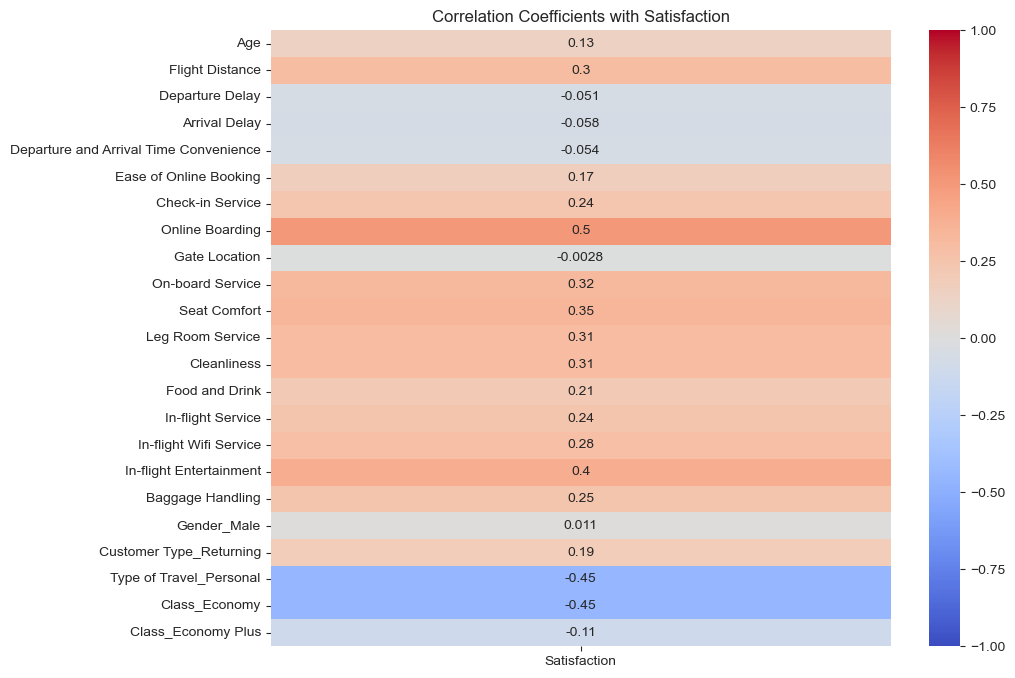

In [78]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlation coefficients for the 'Satisfaction' feature
satisfaction_corr = correlation_matrix['Satisfaction'].drop('Satisfaction')

# Plot the correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(satisfaction_corr.to_frame(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Coefficients with Satisfaction')
plt.show()

#### Feature Importance with Tree-Based Methods (Random Forest)

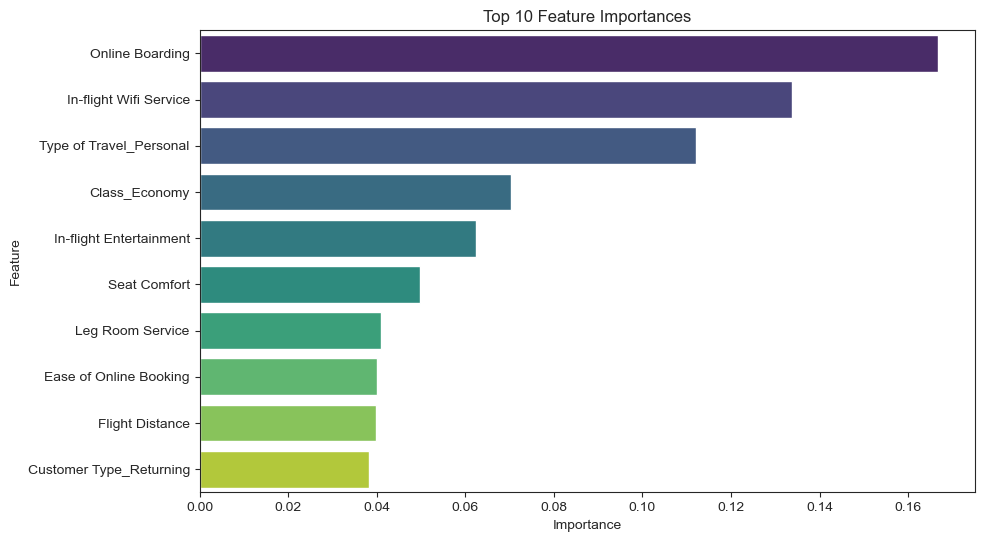

In [79]:
# Fit a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Compute feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()

---

## **Task 2: In-Modeling Explanations**

#### **2.1 Logistic Regression**

In [80]:
# Define the model
lr = LogisticRegression(random_state=42, max_iter=1000)

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation on the training set 
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Display cross-validation accuracy results
print('Cross-Validation - Train:')
print('Accuracy (mean):', cv_scores.mean())

lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = lr.predict(X_test_scaled)

# Evaluate the model on the test set
print('\nEvaluation on Test Set:')
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

Cross-Validation - Train:
Accuracy (mean): 0.874326286611757

Evaluation on Test Set:
Accuracy: 0.874037573144441
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14723
           1       0.87      0.84      0.85     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [81]:
# Coeficients of LR
feature_names = X_train.columns  
coefficients = lr.coef_[0]  
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

Age: -0.1406
Flight Distance: -0.0152
Departure Delay: 0.1049
Arrival Delay: -0.2969
Departure and Arrival Time Convenience: -0.2022
Ease of Online Booking: -0.2207
Check-in Service: 0.4162
Online Boarding: 0.8102
Gate Location: 0.0317
On-board Service: 0.3906
Seat Comfort: 0.0886
Leg Room Service: 0.3234
Cleanliness: 0.2982
Food and Drink: -0.0352
In-flight Service: 0.1414
In-flight Wifi Service: 0.5356
In-flight Entertainment: 0.0765
Baggage Handling: 0.1651
Gender_Male: 0.0274
Customer Type_Returning: 0.7846
Type of Travel_Personal: -1.2603
Class_Economy: -0.3540
Class_Economy Plus: -0.2148


>By comparing coefficients, we can rank the features based on their impact on the target. Positive impacts include In-flight Wifi Service > Online Boarding > On-board Service. Negative impacts include Type of Travel_Personal > Class_Economy Plus > Class_Economy.


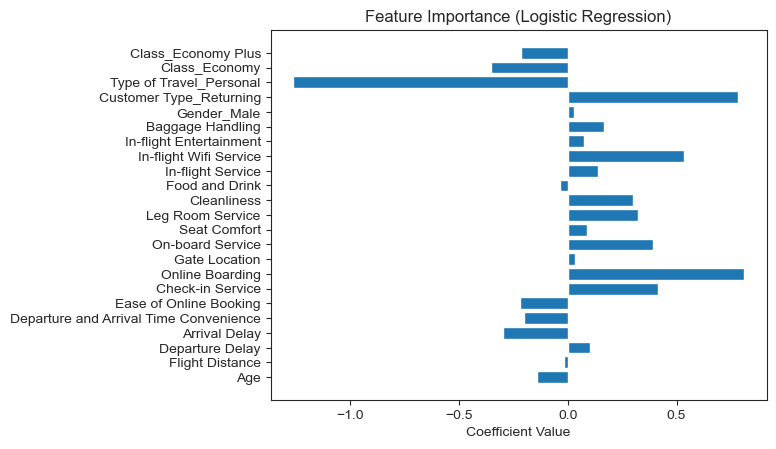

In [82]:
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

##### Key Interpretability Insights of Logistic Regression

The interpretability of this model relies on comparing the magnitude and direction of the coefficients: LR provides a ranking of features based on their impact on the target variable. However, the model has limitations:assumes a linear relationship between features and does not account for interactions between features, such as how Class: Economy might interact with Seat Comfort. 


#### **2.2 Decision Tree**

First we start by evaluating different values of max_depth by their accuracy on Train and Test Sets.

In [83]:
max_depth=[]
accuracies = []
accuracies_train = []

for n in range(1,20,2):
    model = DecisionTreeClassifier(random_state=42,max_depth=n)
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    y_pred_train = model.predict(X_train)
    accuracy_train =  accuracy_score(y_train, y_pred_train)
    accuracies_train.append(accuracy_train)
    max_depth.append(n)
    accuracies.append(accuracy)
    print(f"With Max Depth of {n} the accuracy on the train data is {accuracy_train} and the accuracy on the test data is {accuracy}")

With Max Depth of 1 the accuracy on the train data is 0.7868417000307977 and the accuracy on the test data is 0.7870341854019095
With Max Depth of 3 the accuracy on the train data is 0.8848552510009239 and the accuracy on the test data is 0.8829303972898059
With Max Depth of 5 the accuracy on the train data is 0.905123960578996 and the accuracy on the test data is 0.9050662149676625
With Max Depth of 7 the accuracy on the train data is 0.9256429011395134 and the accuracy on the test data is 0.9253156760086233
With Max Depth of 9 the accuracy on the train data is 0.9433611795503541 and the accuracy on the test data is 0.940714505697567
With Max Depth of 11 the accuracy on the train data is 0.9541307360640592 and the accuracy on the test data is 0.9480674468740375
With Max Depth of 13 the accuracy on the train data is 0.9635817677856483 and the accuracy on the test data is 0.9526870957807206
With Max Depth of 15 the accuracy on the train data is 0.9714544194641207 and the accuracy on the

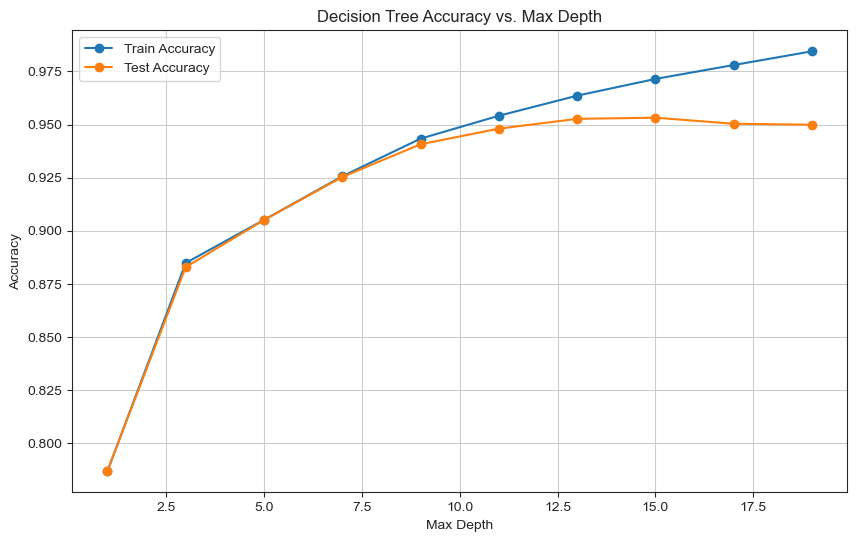

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth, accuracies_train, label='Train Accuracy', marker='o')
plt.plot(max_depth, accuracies, label='Test Accuracy', marker='o')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


To balance performance with interpretability, and because this is intended to be our glass-box model, we decided to set the max_depth value to 4.

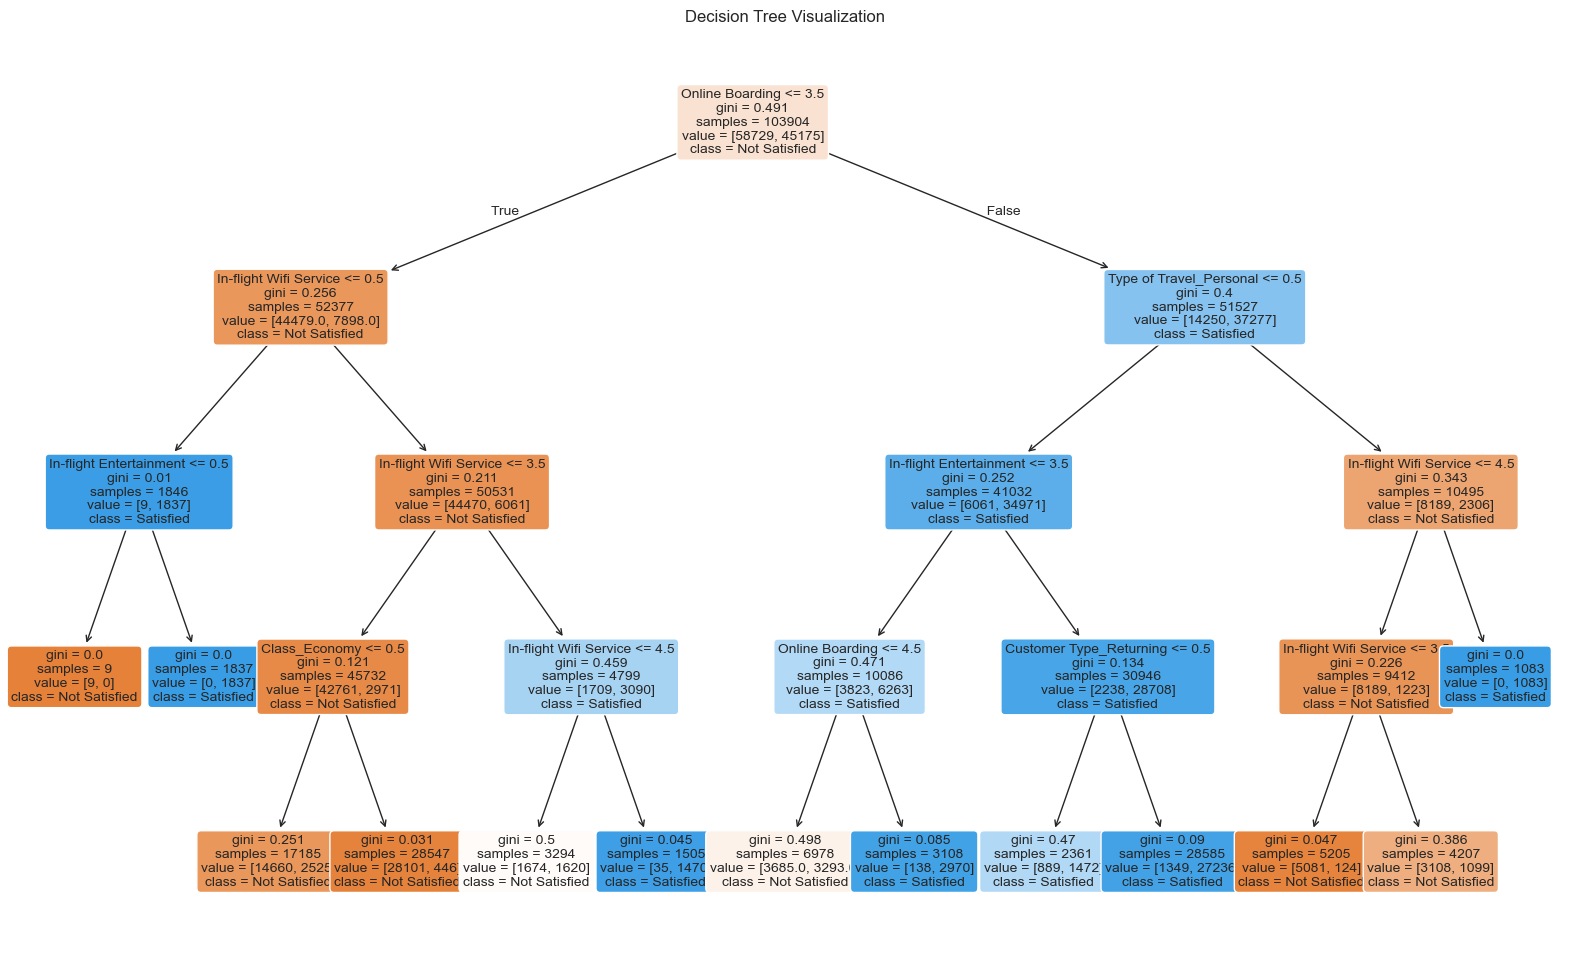

In [85]:
dt = DecisionTreeClassifier(random_state=42,max_depth=4)
dt.fit(X_train,y_train)

# Plot the decision tree
plt.figure(figsize=(20, 12))
plot_tree(
    dt,
    feature_names=X_train.columns,
    class_names=("Not Satisfied","Satisfied"),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [86]:
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

print('Cross-Validation - Train:')
print('Accuracy (mean):', cv_scores.mean())


# Train the model on the full training set
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

print('\nEvaluation on Test Set:')
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('Classification Report:\n', classification_report(y_test, y_test_pred))

Cross-Validation - Train:
Accuracy (mean): 0.8891476856658922

Evaluation on Test Set:
Accuracy: 0.8862026485987065
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     14723
           1       0.93      0.79      0.86     11253

    accuracy                           0.89     25976
   macro avg       0.90      0.88      0.88     25976
weighted avg       0.89      0.89      0.88     25976



Decision Trees provide a measure of feature importance based on how much each feature contributes to reducing impurity (e.g., Gini index, entropy) across all splits.

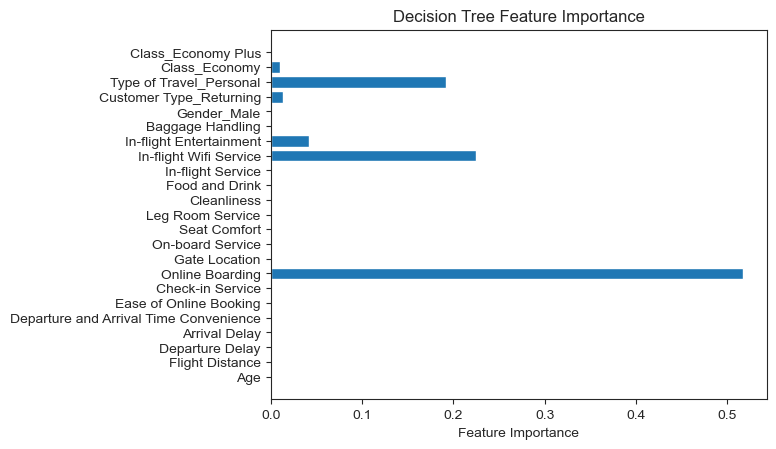

In [87]:
importance = dt.feature_importances_
plt.barh(X_train.columns, importance)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

> Each path from the root to a leaf node represents a decision rule, so we can extract and express these rules in plain language for easy interpretation:

In [88]:
tree_rules = export_text(dt, feature_names=X_train.columns.tolist())
print(tree_rules)

|--- Online Boarding <= 3.50
|   |--- In-flight Wifi Service <= 0.50
|   |   |--- In-flight Entertainment <= 0.50
|   |   |   |--- class: 0
|   |   |--- In-flight Entertainment >  0.50
|   |   |   |--- class: 1
|   |--- In-flight Wifi Service >  0.50
|   |   |--- In-flight Wifi Service <= 3.50
|   |   |   |--- Class_Economy <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Class_Economy >  0.50
|   |   |   |   |--- class: 0
|   |   |--- In-flight Wifi Service >  3.50
|   |   |   |--- In-flight Wifi Service <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- In-flight Wifi Service >  4.50
|   |   |   |   |--- class: 1
|--- Online Boarding >  3.50
|   |--- Type of Travel_Personal <= 0.50
|   |   |--- In-flight Entertainment <= 3.50
|   |   |   |--- Online Boarding <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Online Boarding >  4.50
|   |   |   |   |--- class: 1
|   |   |--- In-flight Entertainment >  3.50
|   |   |   |--- Customer Type_Returning <= 0.50
|   |   |   |   

---

## **Task 3: Post-Modeling Explanations**

### **Black-Box Models and Performance Evaluation**

In [89]:
# Train neural network
nn = MLPClassifier(random_state=42, max_iter=1000)
nn.fit(X_train, y_train)

# Evaluate on test set
y_pred = nn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9025254080689867
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     14723
           1       0.84      0.95      0.89     11253

    accuracy                           0.90     25976
   macro avg       0.90      0.91      0.90     25976
weighted avg       0.91      0.90      0.90     25976



In [90]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate on test set
y_pred = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9624268555589776
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [91]:
# Train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Evaluate on test set
y_pred = gb.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 0.9402140437326764
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14723
           1       0.94      0.92      0.93     11253

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



Based on the model performance, we opt for the Random Forest model as our black-box model.

### **Task 3.1 Simplification-Based XAI**

The goal of simplification-based XAI is to approximate the complex black-box model with a more interpretable surrogate model. In this case, we use a Decision Tree as the surrogate model to approximate the Random Forest.

This process involves:
1. Generating Predictions from the Random Forest: Create a dataset where the target variable is the predictions of the black-box model, not the original labels.
2. Training the Surrogate Model: Use these predictions as the target variable to train a Decision Tree.
3. Compare Predictions of the Surrogate and Black-Box Models: Compare the predictions of the Decision Tree with those of the Random Forest to assess fidelity, i.e., how well the surrogate Decision Tree approximates the behavior of the black-box Random Forest.

#### **Step 1: Generate Predictions from the Random Forest (Black-Box Model)**

In [92]:
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Generate predictions for the training and testing sets
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Create new datasets with the predictions as the target variable
X_train_surrogate = X_train.copy()
X_test_surrogate = X_test.copy()
y_train_surrogate = y_train_pred_rf
y_test_surrogate = y_test_pred_rf

# Display the shapes of the new datasets
print("X_train_surrogate shape:", X_train_surrogate.shape)
print("y_train_surrogate shape:", y_train_surrogate.shape)
print("X_test_surrogate shape:", X_test_surrogate.shape)
print("y_test_surrogate shape:", y_test_surrogate.shape)

X_train_surrogate shape: (103904, 23)
y_train_surrogate shape: (103904,)
X_test_surrogate shape: (25976, 23)
y_test_surrogate shape: (25976,)


#### **Step 2: Train the Surrogate Model (Decision Tree)**

In [93]:
# Train the Decision Tree model on the surrogate training data
dt_surrogate = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_surrogate.fit(X_train_surrogate, y_train_surrogate)

# Generate predictions for the surrogate testing data
y_test_pred_dt_surrogate = dt_surrogate.predict(X_test_surrogate)

# Evaluate the surrogate model
print('Surrogate Model Accuracy:', accuracy_score(y_test_surrogate, y_test_pred_dt_surrogate))
print(classification_report(y_test_surrogate, y_test_pred_dt_surrogate))

Surrogate Model Accuracy: 0.907914998460117
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     15079
           1       0.94      0.83      0.88     10897

    accuracy                           0.91     25976
   macro avg       0.92      0.90      0.90     25976
weighted avg       0.91      0.91      0.91     25976



The Decision Tree surrogate model achieved an accuracy of 91% in predicting the Random Forest's predictions on the test set. 

While it performed well with high precision for class 1 (0.94), its recall for class 1 was lower (0.83), indicating that it missed some positive predictions. For class 0, the model showed strong recall (0.96) but slightly lower precision (0.89). 

Overall, the model successfully approximated the Random Forest's behavior, with a balanced trade-off between precision and recall, though some improvements in capturing all positive cases could be made.

#### **Step 3: Compare Predictions of the Surrogate and Black-Box Models**

In [94]:
print('Random Forest Model Accuracy:', accuracy_score(y_test, y_test_pred_rf))
print('Decision Tree Surrogate Model Accuracy:', accuracy_score(y_test, y_test_pred_dt_surrogate))

print('\nRandom Forest Model Classification Report:')
print(classification_report(y_test, y_test_pred_rf))

print('\nDecision Tree Surrogate Model Classification Report:')
print(classification_report(y_test, y_test_pred_dt_surrogate))

Random Forest Model Accuracy: 0.9624268555589776
Decision Tree Surrogate Model Accuracy: 0.8862026485987065

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


Decision Tree Surrogate Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     14723
           1       0.93      0.79      0.86     11253

    accuracy                           0.89     25976
   macro avg       0.90      0.88      0.88     25976
weighted avg       0.89      0.89      0.88     25976




The Random Forest model achieved an accuracy of 96.2%, demonstrating strong performance with high precision and recall for both classes.

The Decision Tree surrogate model, trained on the Random Forest's predictions, achieved a lower accuracy of 88.6%, as expected. 

The lower accuracy of 88.6% for the Decision Tree compared to 91% earlier arises because, in the earlier evaluation, the Decision Tree was measuring how well it replicated the Random Forest's predictions, whereas now it is directly predicting the true class labels from the test data, which is a more challenging task.

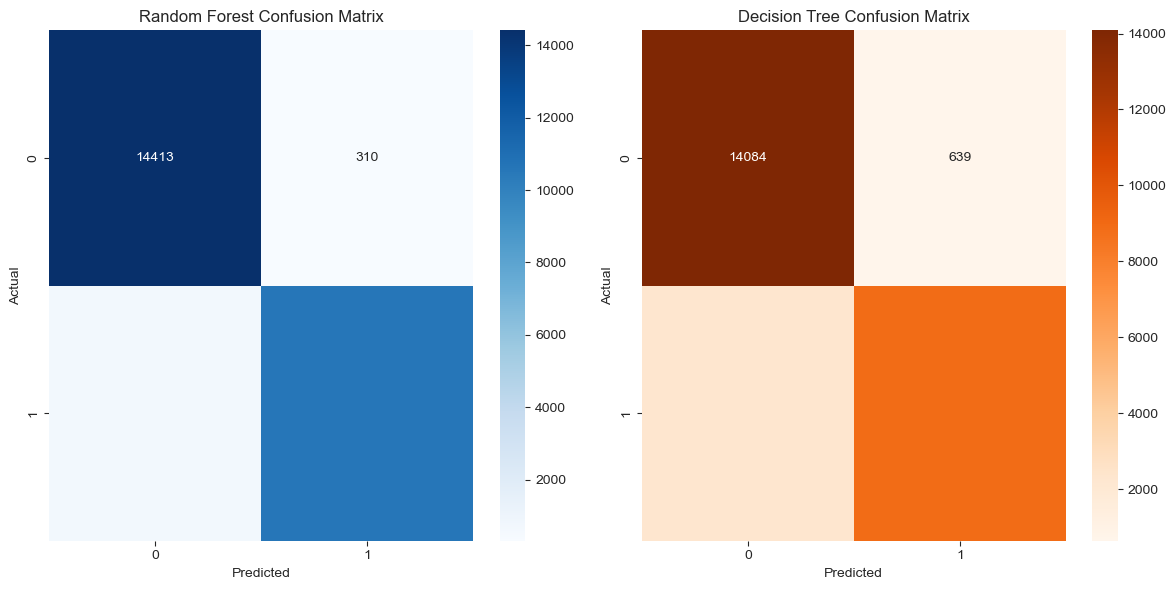

In [95]:
# Compute confusion matrices
rf_cm = confusion_matrix(y_test, y_test_pred_rf)
dt_cm = confusion_matrix(y_test, y_test_pred_dt_surrogate)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### **Step 4: Surrogate Model Interpretability**


This Decision Tree allows us to segment customers into different groups with distinct characteristics and needs.

In [96]:
file_path = "../data/Customer_Segments.xlsx"
df = pd.read_excel(file_path)
pd.set_option('display.max_colwidth', None)
df

Customer Segment  \
0        Highly Dissatisfied Customers   
1  Dissatisfied But Tolerant Customers   
2          Satisfied Economy Travelers   
3         Satisfied Business Travelers   
4       Moderately Satisfied Customers   
5           Highly Satisfied Customers   

                                                                      Key Characteristics  \
0        - In-flight WiFi Service ≤ 0.5\n- In-flight Entertainment ≤ 0.5\n- Economy Class   
1        - In-flight WiFi Service ≤ 3.5\n- Tolerant of average Online Boarding experience   
2  - In-flight WiFi Service ≥ 3.5\n- Online Boarding ≥ 4.5\n- Travel for personal reasons   
3                            - Type of Travel = Business\n- In-flight Entertainment > 3.5   
4          - In-flight WiFi Service between 3.5 and 4.5\n- Decent In-flight Entertainment   
5                         - In-flight WiFi Service > 4.5\n- In-flight Entertainment > 3.5   

                                                                                          Insights  \
0             These customers are highly dissatisfied due to poor WiFi and entertainment services.   
1                                These customers are dissatisfied but less sensitive than Group 1.   
2              These travelers are satisfied when WiFi and entertainment meet a minimum threshold.   
3  Business travelers are satisfied when core services like entertainment and WiFi are sufficient.   
4                            These customers have mixed experiences but lean towards satisfaction.   
5                            These are your most satisfied customers and advocates for your brand.   

                                                                                       Actionable Strategies  
0                        Prioritize improving WiFi and entertainment offerings, especially in economy class.  
1                                        Ensure consistency in WiFi quality and improve boarding efficiency.  
2         Maintain current service levels and offer loyalty rewards or promotions to retain these customers.  
3          Provide additional perks like priority boarding and premium WiFi packages for business travelers.  
4  Monitor their experiences closely and ensure consistency in key service areas to prevent dissatisfaction.  
5             Leverage their satisfaction by encouraging referrals, reviews, and loyalty program enrollment.

From it, we can conclude that WiFi Service and Entertainment are two key factors. If one is lacking, the other should compensate for it. The distinction between Personal and Business travel is also interesting, as it shows that business travelers tend to remain satisfied even with lower conditions in WiFi and entertainment, likely due to other comfort-related factors.

This insight highlights the importance of prioritizing these features while recognizing that business travelers may have different expectations compared to personal travelers.

### **Task 3.2 Feature-Based XAI**

#### **Sensitivity Analysis**

To access the Sensitivity Analysis, we employ both **Partial Dependence Plots (PDP)** and **Individual Conditional Expectation (ICE)** on two of the considered most important features by the glass-box models and In-modelling XAI.  

These methods are applied both separately and together to provide a comprehensive understanding of the model's behavior. While PDP shows the average effect of one or two features on the model's predictions, ICE offers a more detailed view by illustrating how predictions vary for individual instances. When used together, they complement each other effectively—especially in the presence of feature interactions, where ICE plots can reveal nuanced insights that might be missed with PDP alone.


**Partial Dependence Plots (PDPs):**

In [97]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

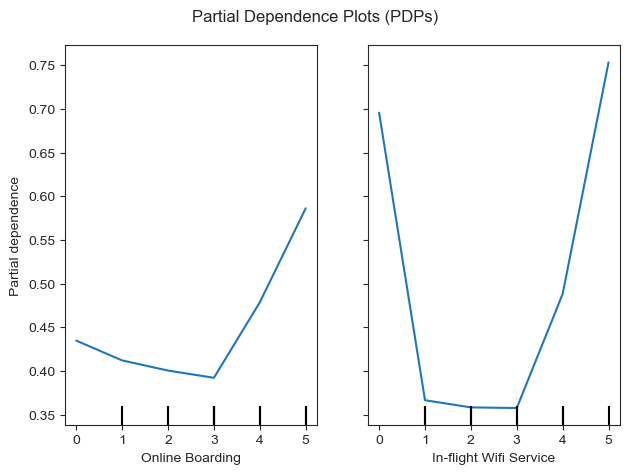

In [98]:
selected_features = [7, 15]  

# Generate PDPs
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    selected_features,
    grid_resolution=50,
)

# Display the plot
plt.suptitle("Partial Dependence Plots (PDPs)")
plt.tight_layout()
plt.show()


The sudden increase in satisfaction for **low "In-flight Wifi Service" scores seems unusual** and could be due to two potential issues:
 - First, this might reflect an interaction with other variables not captured by the Partial Dependence Plot, where passengers who rated Wi-Fi poorly may still have high satisfaction due to other positive experiences. 
 - Second, it could be caused by an imbalanced distribution, with few data points for low Wi-Fi scores, leading to unreliable predictions influenced by outliers or noise in the dataset.

This fact may explain why its consistently considered one of the main important features to contribute to the decision.

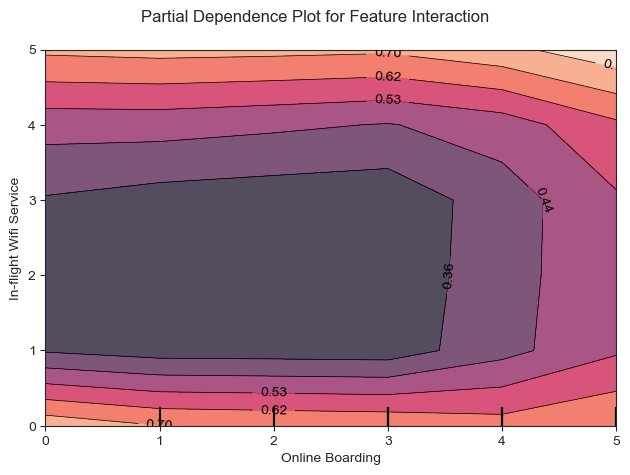

In [99]:
selected_features = [(7, 15)]  

PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    selected_features,
    grid_resolution=50,
)

# Display the plot
plt.suptitle("Partial Dependence Plot for Feature Interaction")
plt.tight_layout()
plt.show()


The PPD for Feature Interaction shows that satisfaction is **predominantly influenced by In-flight Wifi Service**, as most  lines are perpendicular to this feature, driving the descision limits of the graph areas.
Poor or high Wifi Service scores lead to consistently low or high satisfaction regardless of Online Boarding scores, althoug moving horizontally across the plot shows a gradual increase in satisfaction across most Wi-Fi levels.

The high satisfaction area, where both features score around 4-5, shows a **clear synergistic effect** when both features are rated as excellent. 

**Individual Conditional Expectations (ICE):**


In [100]:
X_train.shape

(103904, 23)

In [101]:
# Subset the training data
subset_X_train = X_train.iloc[:1000]

In [102]:
feature_index = 15 
feature_name = "In-flight Wifi Service"

# Obtain ICE data
ice_results = partial_dependence(
    model, subset_X_train, [feature_index], grid_resolution=50, kind="individual"
)

feature_values = ice_results["grid_values"][0]  # Grid of feature values
ice_curves = ice_results["individual"][0]  # Individual curves (ICE)

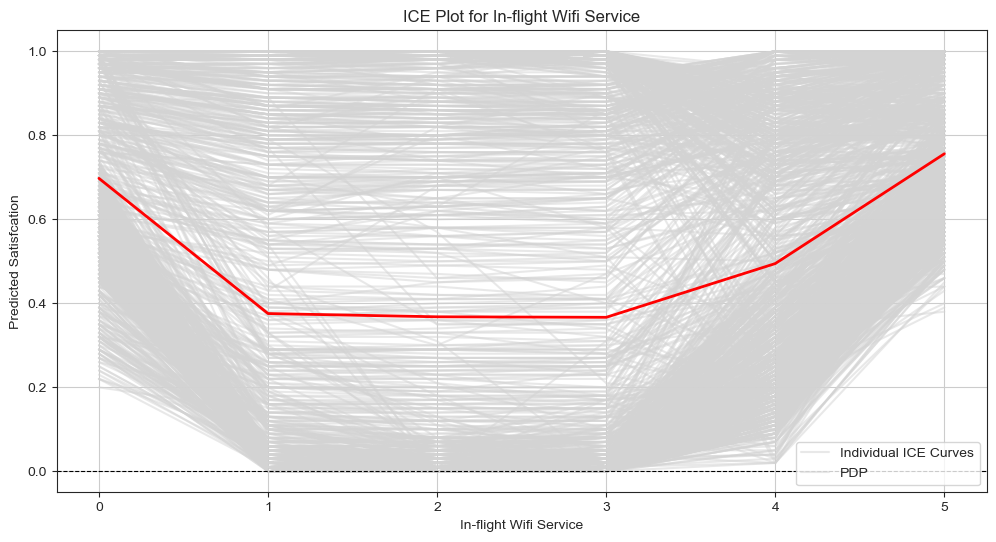

In [103]:
plt.figure(figsize=(12, 6))

# Plot individual ICE curves
for ice_curve in ice_curves:
    plt.plot(feature_values, ice_curve, color="lightgray", alpha=0.5)
    
# Highlight the average curve (PDP)
average_curve = np.mean(ice_curves, axis=0)
plt.plot(feature_values, average_curve, color="red", label="PDP", linewidth=2)

plt.title(f"ICE Plot for {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Predicted Satisfcation")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend(["Individual ICE Curves", "PDP"])
plt.grid()
plt.show()

This ICE plot shows a clear **U-shaped relationship** between Wifi scores and predicted satisfaction. Satisfaction decreases significantly as Wifi scores drop from 2 to 1, remains low for scores around 1–2, and increases steeply as Wifi scores improve beyond 3.

The gray ICE curves highlight **medium to high variability among individual predictions** wich reveals some possible feature interactions that were not possible to infer from the PDP graph. 

Interestingly, in some cases, the individual curves appear flat, suggesting that for certain passengers, Wifi has little to no impact on their satisfaction across the entire range of Wifi scores. In contrast, there are cases where the satisfaction trend seems to move in the **opposite direction** to the overall pattern, particularly in areas with low Wifi scores.



#### **Feature Importance**

For Feature Importance, we utilize LIME  to explain a specific area of interest locally— in specific, the reason why low WiFi values are associated with high satisfaction levels. Additionally, SHAP is employed to provide global insights, offering a broader perspective on the overall contribution of each feature to the model's predictions.


**Local Interpretable Model-Agnostic Explanations (LIME):**


First we start with a random instance:

In [104]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  
    feature_names=X_train.columns,    
    class_names=['Not Satisfied', 'Satisfied'],  
    mode='classification',          
    discretize_continuous=False     
)

In [105]:
instance = X_train.iloc[4].values.reshape(1, -1)

# Generate explanation for the prediction
explanation = explainer.explain_instance(
    instance[0],                        
    model.predict_proba,                 
    num_features=10,                     
    top_labels=1,                        
)

# Show the explanation for the Wifi feature
explanation.show_in_notebook()

>From the LIME explanation, we can understand that Type_Personal = 0 and Class_Economy = 0 (meaning the instance was in Business Class) were the main features pushing to satisfaction, while a poor-rated online boarding and wifi service contributed negatively to the overall satisfaction, leading to a final prediction of non-satisfaction.

Next, we decided to choose an instance with **Wifi Service rated below 2 and Satisfied = 1** to investigate whether there is any local information that could explain the unexpected behavior observed in this area.


In [106]:
low_wifi_instances = X_train[X_train['In-flight Wifi Service'] < 2]

# Make predictions for these instances
predictions = model.predict(X_train.loc[low_wifi_instances.index])

# Find the instances where the prediction is "Satisfied"
satisfied_instances = low_wifi_instances[predictions == 1]

# Display the instances that meet the condition
satisfied_instances

Age  Flight Distance  Departure Delay  Arrival Delay  \
97902    59              616                0            0.0   
61708    55             1635                0            0.0   
116894   41             3185               10            5.0   
108028   46             3345                0            0.0   
43460    26              624                0            0.0   
...     ...              ...              ...            ...   
119346   57             2889                0            0.0   
84654    57             2182               39           31.0   
82386    49             1704              138          134.0   
6265     39              585                0            0.0   
128106   53             1587                2            0.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  \
97902                                        1                       1   
61708                                        1                       1   
116894                                       0                       0   
108028                                       1                       1   
43460                                        0                       1   
...                                        ...                     ...   
119346                                       5                       0   
84654                                        1                       1   
82386                                        1                       1   
6265                                         1                       1   
128106                                       1                       1   

        Check-in Service  Online Boarding  Gate Location  On-board Service  \
97902                  3                4              1                 4   
61708                  4                3              1                 4   
116894                 4                4              2                 5   
108028                 3                5              3                 3   
43460                  1                1              2                 3   
...                  ...              ...            ...               ...   
119346                 5                4              4                 3   
84654                  4                5              1                 3   
82386                  4                4              1                 3   
6265                   3                4              1                 5   
128106                 3                5              1                 5   

        Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
97902              4                 4            5               2   
61708              4                 5            5               3   
116894             4                 5            5               3   
108028             4                 3            4               2   
43460              4                 1            3               3   
...              ...               ...          ...             ...   
119346             4                 3            4               2   
84654              5                 3            4               5   
82386              4                 4            4               4   
6265               4                 5            5               4   
128106             5                 5            5               4   

        In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
97902                   4                       1                        4   
61708                   4                       1                        4   
116894                  5                       0                        5   
108028                  3                       0                        3   
43460                   4                       0                        3   
...                   ...                     ...                      ...   
119346        

In [107]:
instance = satisfied_instances.iloc[0].values.reshape(1, -1)

# Generate explanation for the prediction
explanation = explainer.explain_instance(
    instance[0],                        
    model.predict_proba,                 
    num_features=10,                     
    top_labels=1,                        
)

# Show the explanation for the Wifi feature
explanation.show_in_notebook()

> From this exploration we can see that althoug low-rated wifi might seem to contribute positively to satisfaction, its weight in the prediction is relatively small. This suggests that the model's decision for this instance is not driven by WiFi alone, but rather by the combined contributions of multiple features 


**SHapley Additive exPlanations (SHAP):**
 

 Due to the high computational power required by SHAP we applied it to a subset of the data that allows us to balance computational efficiency while still capturing meaningful insights about feature importance.

In [108]:
random_subset = X_test.sample(n=100, random_state=42)

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(random_subset) 

In [109]:
# Choose an instance to explain
instance_index = 32
instance = random_subset.iloc[instance_index]
print(instance)

Age                                        37.0
Flight Distance                           626.0
Departure Delay                             4.0
Arrival Delay                               1.0
Departure and Arrival Time Convenience      5.0
Ease of Online Booking                      4.0
Check-in Service                            3.0
Online Boarding                             5.0
Gate Location                               3.0
On-board Service                            5.0
Seat Comfort                                5.0
Leg Room Service                            4.0
Cleanliness                                 5.0
Food and Drink                              5.0
In-flight Service                           5.0
In-flight Wifi Service                      4.0
In-flight Entertainment                     5.0
Baggage Handling                            5.0
Gender_Male                                 1.0
Customer Type_Returning                     1.0
Type of Travel_Personal                 

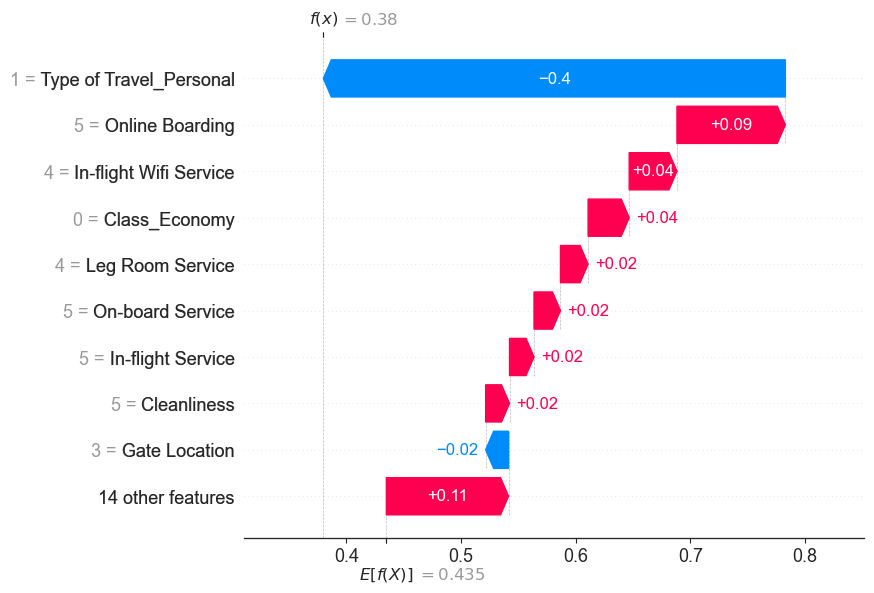

In [110]:
# Create a waterfall plot for the selected instance
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[instance_index,:,1],
        base_values=explainer.expected_value[1],  
        data=instance.values, 
        feature_names=random_subset.columns 
    )
)

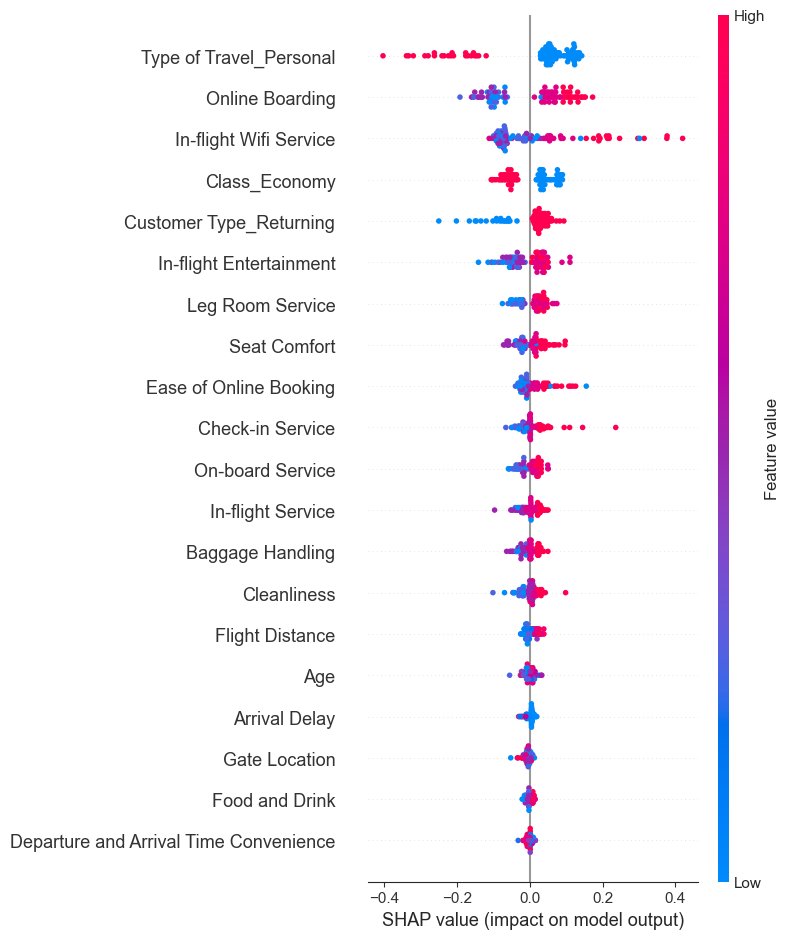

In [111]:
# Generate a beeswarm plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[:,:,1], random_subset, feature_names=random_subset.columns) 

### **Task 3.3 Example-Based XAI**

The DiCE (Diverse Counterfactual Explanations) example-based XAI method was used to generate example-based explanations for two instances from the test dataset.

Counterfactual explanations identify the minimal changes in input features required to shift the model's prediction to the opposite class.

In [112]:
# Create a DataFrame from X_test to use with DiCE
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Instantiate DiCE for Random Forest
data = dice_ml.Data(dataframe=pd.concat([X_train, y_train], axis=1),
                    continuous_features=[col for col in X_train.columns if X_train[col].dtype in [float, int]],
                    outcome_name=y_train.name)

model = dice_ml.Model(model=rf, backend="sklearn")

dice = Dice(data, model)

# Select two instances for explanations
example_1 = X_test_df.iloc[0:1]
example_2 = X_test_df.iloc[1:2]

# Generate counterfactuals
cf_1 = dice.generate_counterfactuals(example_1, total_CFs=50, desired_class="opposite")
cf_2 = dice.generate_counterfactuals(example_2, total_CFs=50, desired_class="opposite")

# Visualize the counterfactual explanations
print("Counterfactual Explanation for Example 1:")
cf_1.visualize_as_dataframe()

print("Counterfactual Explanation for Example 2:")
cf_2.visualize_as_dataframe()

100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

Counterfactual Explanation for Example 1:
Query instance (original outcome : 0)


Age  Flight Distance  Departure Delay  Arrival Delay  \
0   23              546                0            0.0   

   Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                       4                       3   

   Check-in Service  Online Boarding  Gate Location  On-board Service  \
0                 4                3              3                 3   

   Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0             2                 1            2               2   

   In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                  3                       3                        2   

   Baggage Handling  Gender_Male  Customer Type_Returning  \
0                 4            1                        0   

   Type of Travel_Personal  Class_Economy  Class_Economy Plus  Satisfaction  
0                        0              1                   0             0


Diverse Counterfactual set (new outcome: 1)


Age  Flight Distance  Departure Delay  Arrival Delay  \
0    23              546                0            0.0   
1    23              546              341            0.0   
2    23              546                0            0.0   
3    23              546                0            0.0   
4    23              546                0            0.0   
5    23              546                0            0.0   
6    23              546                0            0.0   
7    23              546                0            0.0   
8    23              546                0            0.0   
9    69              546                0            0.0   
10   23              546              112            0.0   
11   23              546                0            0.0   
12   23              546                0            0.0   
13   23              546                0            0.0   
14   23             3043                0            0.0   
15   23              546                0            0.0   
16   23             3192                0            0.0   
17   23              546                0            0.0   
18    9              546                0            0.0   
19   23              546                0            0.0   
20   23              546                0            0.0   
21   23              546                0            0.0   
22   23              546                0            0.0   
23   23              546                0            0.0   
24   23              546                0            0.0   
25   23              546                0            0.0   
26   23              546              237            0.0   
27   23              546                0            0.0   
28   23              546                0            0.0   
29   23              546                0            0.0   
30   23              546                0            0.0   
31   23              546                0            0.0   
32   23              546                0            0.0   
33   23              546                0            0.0   
34   23              546                0            0.0   
35   23              546                0            0.0   
36   23              546                0            0.0   
37   23              546                0            0.0   
38   23              546                0         1053.9   
39   23             3216                0            0.0   
40    9              546                0            0.0   
41   23              546                0            0.0   
42   23             3043                0            0.0   
43   23              546                0            0.0   
44   23              546                0            0.0   
45   23              546                0          956.9   
46   23              546                0            0.0   
47   23              546                0            0.0   
48   23              546                0          956.9   
49   23              546                0            0.0   

    Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                        4                       3   
1                                        4                       3   
2                                        5                       3   
3                                        4                       3   
4                                        4                       3   
5                                        4                       3   
6                                        4                       1   
7                                        4                       3   
8                                        4                       3   
9                                        4                       3   
10                                       4                       3   
11                                       4                       3   
12                               

Counterfactual Explanation for Example 2:
Query instance (original outcome : 1)


Age  Flight Distance  Departure Delay  Arrival Delay  \
0   38              531                0            0.0   

   Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                       1                       1   

   Check-in Service  Online Boarding  Gate Location  On-board Service  \
0                 2                5              1                 2   

   Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0             5                 2            5               5   

   In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                  3                       5                        5   

   Baggage Handling  Gender_Male  Customer Type_Returning  \
0                 1            1                        1   

   Type of Travel_Personal  Class_Economy  Class_Economy Plus  Satisfaction  
0                        0              1                   0             1


Diverse Counterfactual set (new outcome: 0)


Age  Flight Distance  Departure Delay  Arrival Delay  \
0    38              531                0            0.0   
1    38              531                0            0.0   
2    38              531              112          326.3   
3    38              531                0            0.0   
4    38              531                0            0.0   
5    73              531                0            0.0   
6    38              531                0            0.0   
7    38              531              336            0.0   
8    38              531                0            0.0   
9    38              531                0            0.0   
10   38              531                0            0.0   
11   33              531                0            0.0   
12   38              531              370            0.0   
13   38              531                0            0.0   
14   38              531              420            0.0   
15   38             1813                0            0.0   
16   38              531                0            0.0   
17   38              531                0            0.0   
18   38              531                0            0.0   
19   38              531                0            0.0   
20   38              531                0            0.0   
21   38              531                0            0.0   
22   38              531                0            0.0   
23   38              531                0            0.0   
24   38              531                0            0.0   
25   38              531                0            0.0   
26   38              531                0            0.0   
27   38              531                0            0.0   
28   38              531               36            0.0   
29   38              531                0            0.0   
30   38              531                0            0.0   
31   38              531                0            0.0   
32   38              531                0            0.0   
33   38              531                0            0.0   
34   44              531                0            0.0   
35   38              531                0            0.0   
36   10              531                0            0.0   
37   38              531                0            0.0   
38   38              531                0            0.0   
39   38              531                0            0.0   
40   38              531                0            0.0   
41   44              531                0            0.0   
42   38              531                0            0.0   
43   38              531                0            0.0   
44   38              531              277            0.0   
45   38              531                0            0.0   
46   38              531                0            0.0   
47   38              531                0            0.0   
48   38             1984                0            0.0   
49   38              531                0            0.0   

    Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                        1                       1   
1                                        1                       1   
2                                        2                       1   
3                                        1                       1   
4                                        1                       1   
5                                        1                       1   
6                                        1                       2   
7                                        1                       1   
8                                        1                       5   
9                                        1                       1   
10                                       1                       2   
11                                       1                       1   
12                               

>For example, adjustments to features such as online boarding and in-flight service were critical in changing predicted passenger satisfaction. By analyzing these explanations, we gain actionable insights into the factors that drive model decisions and better understand what influences predictions.

---

## **Task 4: Quality of the Explanations**

### **4.1. Evaluating Simplification-Based XAI**

In this section, we evaluate the quality of the Simplification-Based XAI method, focusing on the following metrics: Accuracy, and Fidelity.

#### **Accuracy**

In [113]:
# Accuracy of the surrogate model compared to ground truth labels
dt_accuracy = accuracy_score(y_test, y_test_pred_dt_surrogate)
print(f"Decision Tree Accuracy (on ground truth): {dt_accuracy:.4f}")

# Accuracy of the Random Forest model compared to ground truth labels
rf_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Accuracy (on ground truth): {rf_accuracy:.4f}")

Decision Tree Accuracy (on ground truth): 0.8862
Random Forest Accuracy (on ground truth): 0.9624


>The accuracy of the Decision Tree surrogate model was 88.6%, which is lower than the Random Forest's accuracy of 96.2%. This decrease in accuracy is expected, as the surrogate model approximates the black-box model's predictions rather than the true labels.

#### **Fidelity**

In [114]:
# Fidelity: How well the Decision Tree replicates the Random Forest's predictions
fidelity = accuracy_score(y_test_pred_rf, y_test_pred_dt_surrogate)
print(f"Fidelity (DT matching RF predictions): {fidelity:.4f}")

Fidelity (DT matching RF predictions): 0.9079


>The fidelity of the Decision Tree surrogate model was 91%, indicating that it closely approximated the Random Forest's predictions. This high fidelity suggests that the Decision Tree captures the key patterns and decision boundaries of the Random Forest.

### **4.2. Evaluating Feature Importance XAI**

#### **Lime: Fidelity**

In [115]:
# Generate LIME explanations for a subset of the test data
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X_train.columns,
    class_names=['Not Satisfied', 'Satisfied'],
    mode='classification'
)

# Select a subset of the test data for evaluation
num_samples = 100
X_test_subset = X_test_scaled[:num_samples]
y_test_subset = y_test[:num_samples]

# Measure fidelity
fidelity_scores = []

for i in range(num_samples):
    exp = explainer.explain_instance(
        X_test_subset[i],
        rf.predict_proba,
        num_features=10
    )
    
    # Original model prediction
    original_class = rf.predict(X_test_subset[i].reshape(1, -1)).item()
    
    # Surrogate approximation (dominant class from local explanation)
    contributions = exp.as_map()
    surrogate_class = max(contributions, key=lambda x: sum(abs(w) for _, w in contributions[x]))
    
    # Compare predicted classes
    fidelity = int(original_class == surrogate_class)
    fidelity_scores.append(fidelity)

# Calculate the average fidelity score
average_fidelity = np.mean(fidelity_scores)
print(f'Average Fidelity Score: {average_fidelity:.4f}')

Average Fidelity Score: 0.6700


>The average fidelity score of 0.6900 indicates that in about 69% of cases, the explanations provided by LIME match the original model’s behavior. This can be due to the complexity of interactions in the Airline Satisfaction dataset, which are challenging for linear models to approximate. The Random Forest model used is complex, involving high non-linearity and intricate interactions between features. LIME, which approximates these predictions using simpler linear models, struggles to fully capture these complex decision boundaries. 

#### **SHAP: Consistency**

In [116]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

# Select a random subset of data for analysis
random_subset = X_test.sample(n=50, random_state=42)

# Explain the predictions of the Random Forest model using SHAP
explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf = explainer_rf.shap_values(random_subset)

# Explain the predictions of the Gradient Boosting model using SHAP
explainer_gb = shap.TreeExplainer(model_gb)
shap_values_gb = explainer_gb.shap_values(random_subset)

In [117]:
# Calculate the average cosine distance between the SHAP values of Random Forest and Gradient Boosting

# Extract the SHAP values for the positive class (index 1)
shap_values_rf_class_1 = shap_values_rf[:,:,1]  
shap_values_gb_class_1 = shap_values_gb[:,:]  

# Calculate the cosine distance between the SHAP values for each sample
cosine_distances_per_sample = []

for i in range(len(random_subset)):
    # Calculate the cosine distance between the SHAP values of sample i for the two models
    distance = cosine_distances([shap_values_rf_class_1[i]], [shap_values_gb_class_1[i]])
    cosine_distances_per_sample.append(distance[0][0])  

# Calculate the average cosine distance
average_cosine_distance = np.mean(cosine_distances_per_sample)

# Display the average cosine distance
print(f'Average Cosine Distance: {average_cosine_distance:.4f}')

Average Cosine Distance: 0.0792


> A cosine distance of 0.0739 suggests that the SHAP contributions from both the Random Forest and Gradient Boosting models are very similar on average. This indicates that, despite the differences in how the models operate, the important features and their contributions to predictions are consistent across both models.

### **4.3. Evaluating Example-Based XAI**

In this section, we evaluate the quality of the Example-Based XAI method.

#### **Plausibility**

In [118]:
def evaluate_counterfactual_plausibility(original_data, cf_object):
    
    # Extract counterfactuals
    cf_df = cf_object.cf_examples_list[0].final_cfs_df
    cf_df = cf_df[original_data.columns]

    # 1. Feature correlation preservation
    original_corr = original_data.corr()
    cf_corr = cf_df.corr()
    correlation_diff = np.abs(original_corr - cf_corr).mean().mean()

    # 2. Distribution similarity (using the Jensen-Shannon Divergence)

    # Scale the data
    scaler = StandardScaler()
    original_scaled = scaler.fit_transform(original_data)
    cf_scaled = scaler.transform(cf_df)

    # Bin data into histograms
    bins = np.histogram_bin_edges(np.concatenate([original_scaled.flatten(), cf_scaled.flatten()]), bins=20)
    original_hist, _ = np.histogram(original_scaled, bins=bins, density=True)
    cf_hist, _ = np.histogram(cf_scaled, bins=bins, density=True)

    # Convert to probability distributions
    original_dist = original_hist / np.sum(original_hist)
    cf_dist = cf_hist / np.sum(cf_hist)

    # Small constant to avoid zero probabilities
    epsilon = 1e-10
    original_dist += epsilon
    cf_dist += epsilon

    # Compute Jensen-Shannon Divergence
    distribution_similarity = 1 - jensenshannon(original_dist, cf_dist)

    # 3. Diversity
    diversity = len(np.unique(cf_df.values, axis=0)) / len(cf_df)

    return {
        'correlation_preservation': 1 - correlation_diff,
        'distribution_similarity': distribution_similarity,
        'diversity': diversity
    }

# Get metrics directly from DiCE objects
metrics_ex1 = evaluate_counterfactual_plausibility(X_train, cf_1)
metrics_ex2 = evaluate_counterfactual_plausibility(X_train, cf_2)

print("Plausibility Metrics for Example 1:")
for metric, value in metrics_ex1.items():
    print(f"{metric}: {value:.4f}")

print("\nPlausibility Metrics for Example 2:")
for metric, value in metrics_ex2.items():
    print(f"{metric}: {value:.4f}")

Plausibility Metrics for Example 1:
correlation_preservation: 0.8540
distribution_similarity: 0.9178
diversity: 0.8600

Plausibility Metrics for Example 2:
correlation_preservation: 0.8266
distribution_similarity: 0.8700
diversity: 0.9200


> The counterfactuals in Example 1 preserve the feature correlations in the original data slightly better than those in Example 2, indicating that the relationships between features in the counterfactuals remain more consistent with the original data. The counterfactuals in Example 1 are also more similar to the original data in terms of their overall distribution, suggesting that the counterfactuals in Example 1 are more realistic because they better match the statistical properties of the original dataset. In terms of diversity, Example 2 has a higher value, a value that reflects how many different (non-redundant) counterfactuals exist in the dataset.